# Data exploration

Load the data

In [13]:
import pandas as pd

df = pd.read_csv('Docking_Requests_Dataset.csv')
print(df.head(10))

   Ship ID  Start Time (hr)  End Time (hr)  Priority Weight
0  Ship-01             0.37           2.83               72
1  Ship-02             1.05           2.04               27
2  Ship-03             2.51           4.30               99
3  Ship-04             2.81           4.79               53
4  Ship-05             2.81           3.42               43
5  Ship-06             3.27           5.29               83
6  Ship-07             3.30           4.23               71
7  Ship-08             3.82           4.48               23
8  Ship-09             5.24           8.11               57
9  Ship-10             5.26           8.17               24


The datasets contain 4 rows and 25 columns

 - Ship ID : Unique identifies for each ship
 - Start time (hr): Start time for each ship in hour
 - End time (hr) : End time for each ship in hour
 - Prority weight : Weight priority for each ship

# Data Visualization

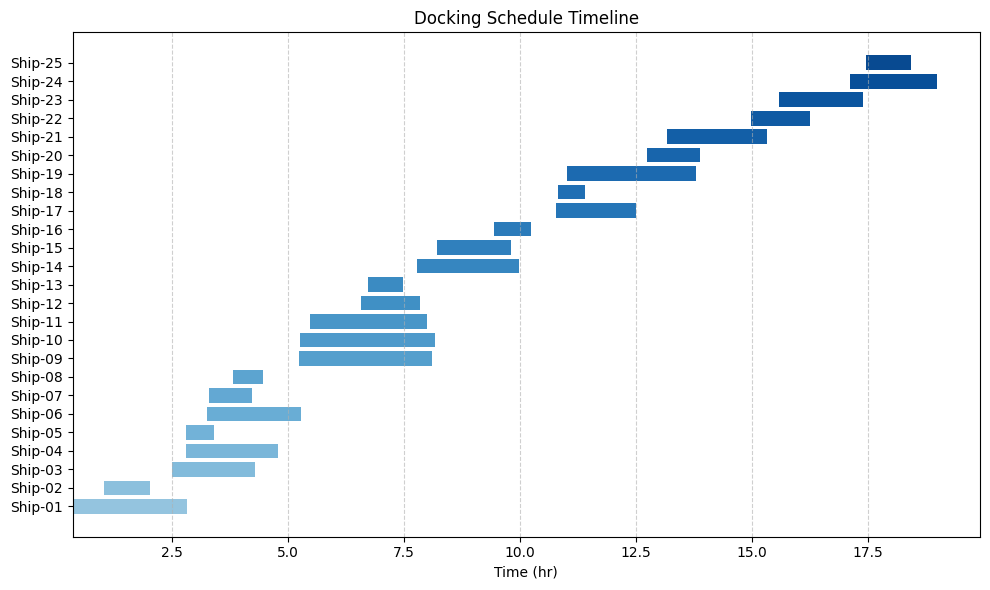

In [10]:
# For visualisation purpose

import matplotlib.pyplot as plt
import numpy as np

df_plot = df.copy().reset_index(drop=True)

# Assign a vertical position (y) to each ship
df_plot['y'] = range(len(df_plot))

blues = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_plot)))

# Set up the figure
plt.figure(figsize=(10, 6))

# Draw a bar for each ship
for i, row in df_plot.iterrows():
    plt.barh(
        y=row['y'],
        width=row['End Time (hr)'] - row['Start Time (hr)'],
        left=row['Start Time (hr)'],
        height=0.8,
        color=blues[i]
    )

# Set y-ticks to ship IDs for clarity
plt.yticks(df_plot['y'], df_plot['Ship ID'])

# Axis labels and title
plt.xlabel("Time (hr)")
plt.title("Docking Schedule Timeline")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The visual show all the 25 ships with it start and end time. Also which ship is overlapping since only one ship can go at a time.

# Algorithm Selection

The ship's crew needs to select which ship get to go first by meeting all requirements;

- Prioritise ships that dont conflict with another ship
- Only 15 hours is allocated
- Prioritise based on weight priority

# Option 1 : Greedy Algorithm (earliest end time)

This algorithm is a problem-solving procedure that aims to find locally optimal solutions by progressively building candidate solutions at each stage based on the level of improvement.

Steps :

- Select ships that end their docking time earliest , fitting as many as possible without overlap
- With this option we neglect the priority weight as we focuses on maximizing the number of docked ships only


In [14]:
# Sort the docking requests by their end time (earliest finishing ships first)
requests = df.sort_values(by="End Time (hr)")

# Initialize an empty list to store the accepted docking requests
schedule = []

# Track the current end time of the last scheduled ship
current_time = 0

# Iterate over each ship request in the sorted order
for _, row in requests.iterrows():
    if row["Start Time (hr)"] >= current_time:
        schedule.append(row)
        current_time = row["End Time (hr)"]

greedy_schedule_by_time = pd.DataFrame(schedule)
print(greedy_schedule_by_time)

    Ship ID  Start Time (hr)  End Time (hr)  Priority Weight
1   Ship-02             1.05           2.04               27
4   Ship-05             2.81           3.42               43
7   Ship-08             3.82           4.48               23
12  Ship-13             6.74           7.49               96
14  Ship-15             8.21           9.81               49
17  Ship-18            10.82          11.41               91
19  Ship-20            12.75          13.89               33
21  Ship-22            14.98          16.26               98
24  Ship-25            17.46          18.42               38


Visualization

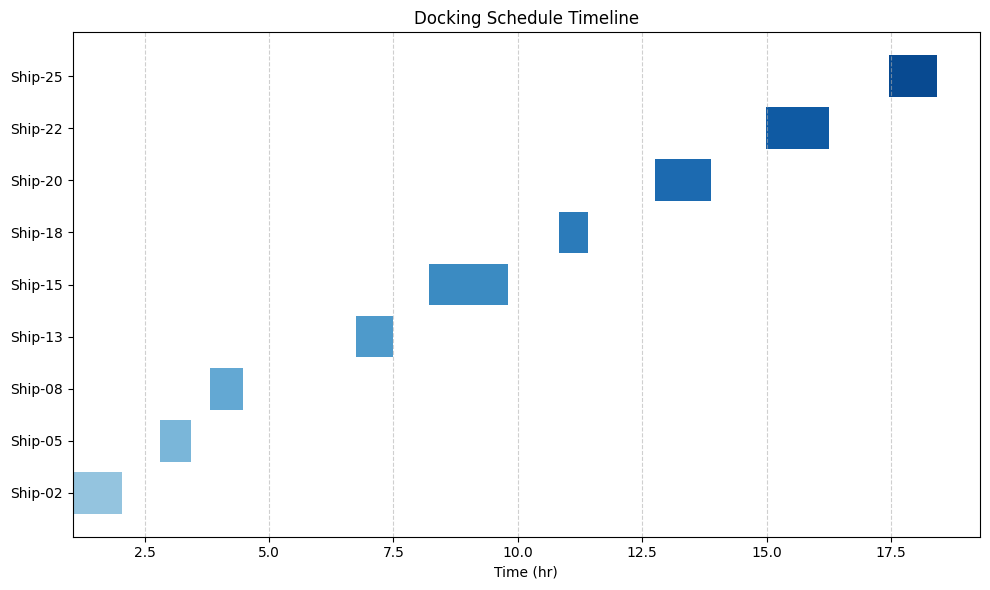

In [15]:
df_plot = greedy_schedule_by_time.copy().reset_index(drop=True)

# Assign a vertical position (y) to each ship
df_plot['y'] = range(len(df_plot))

blues = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_plot)))

# Set up the figure
plt.figure(figsize=(10, 6))

# Draw a bar for each ship
for i, row in df_plot.iterrows():
    plt.barh(
        y=row['y'],
        width=row['End Time (hr)'] - row['Start Time (hr)'],
        left=row['Start Time (hr)'],
        height=0.8,
        color=blues[i]
    )

# Set y-ticks to ship IDs for clarity
plt.yticks(df_plot['y'], df_plot['Ship ID'])

# Axis labels and title
plt.xlabel("Time (hr)")
plt.title("Docking Schedule Timeline")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Option 2 : Greedy Algorithm (include total priority weight)

Steps:

- Still select ships that not overlap but with the highest priority weight in that time windows
- Might lead to decreasing number of ships

In [11]:
df = df.reset_index(drop=True)

requests = df.sort_values(by="End Time (hr)").to_dict(orient="records")

# Compute p(i): index of last non-overlapping job before i
p = []
for i in range(len(requests)):
    j = i - 1
    while j >= 0 and requests[j]["End Time (hr)"] > requests[i]["Start Time (hr)"]:
        j -= 1
    p.append(j)

# Dynamic programming to compute max total priority
n = len(requests)
dp = [0] * (n + 1)
for i in range(1, n + 1):
    include = requests[i-1]["Priority Weight"] + dp[p[i-1] + 1]
    exclude = dp[i-1]
    dp[i] = max(include, exclude)

# Reconstruct optimal schedule
selected = []
i = n
while i > 0:
    if requests[i-1]["Priority Weight"] + dp[p[i-1] + 1] > dp[i-1]:
        selected.append(requests[i-1])
        i = p[i-1] + 1
    else:
        i -= 1

dp_schedule_df = pd.DataFrame(reversed(selected))
print(dp_schedule_df)

   Ship ID  Start Time (hr)  End Time (hr)  Priority Weight
0  Ship-01             0.37           2.83               72
1  Ship-06             3.27           5.29               83
2  Ship-13             6.74           7.49               96
3  Ship-16             9.45          10.25               94
4  Ship-18            10.82          11.41               91
5  Ship-20            12.75          13.89               33
6  Ship-22            14.98          16.26               98
7  Ship-24            17.11          18.98               50


Visualization

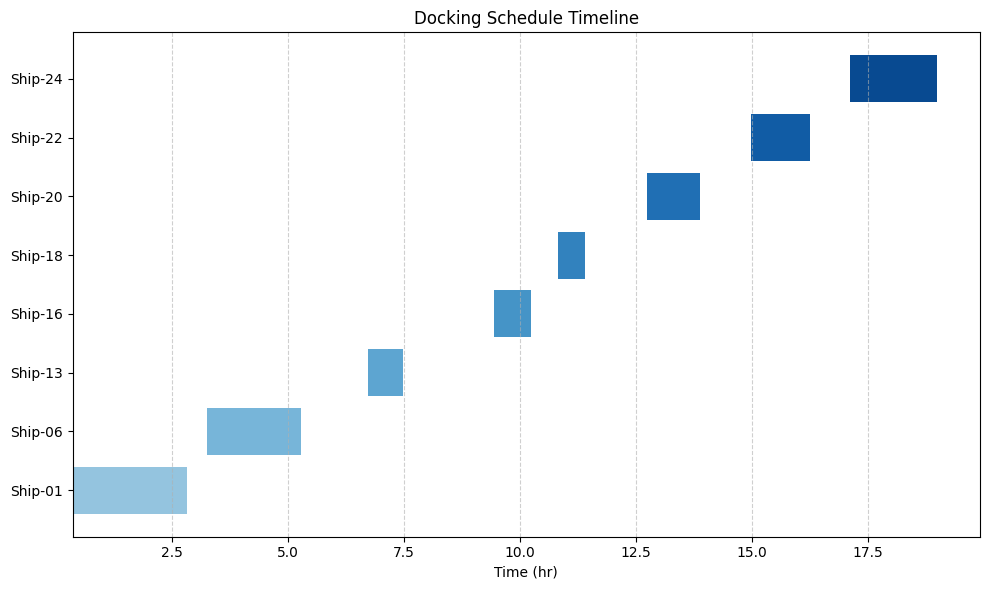

In [12]:
df_plot = dp_schedule_df.copy().reset_index(drop=True)

# Assign a vertical position (y) to each ship
df_plot['y'] = range(len(df_plot))

blues = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_plot)))

# Set up the figure
plt.figure(figsize=(10, 6))

# Draw a bar for each ship
for i, row in df_plot.iterrows():
    plt.barh(
        y=row['y'],
        width=row['End Time (hr)'] - row['Start Time (hr)'],
        left=row['Start Time (hr)'],
        height=0.8,
        color=blues[i]
    )

# Set y-ticks to ship IDs for clarity
plt.yticks(df_plot['y'], df_plot['Ship ID'])

# Axis labels and title
plt.xlabel("Time (hr)")
plt.title("Docking Schedule Timeline")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Option 3 : Greedy with Dynamic Programming

This method using greedy algorithm as main and using dynamic programming for calculating priority weight per hour

Steps:

- Assign weights to each request
- Use dynamic programming (DP) to select the set of requests with the maximum total weight without overlaps

In [6]:
df["Duration"] = df["End Time (hr)"] - df["Start Time (hr)"]
df["Density"] = df["Priority Weight"] / df["Duration"]
df_sorted = df.sort_values(by="Density", ascending=False)

schedule = []
current_time = 0

for idx, row in df_sorted.iterrows():
    overlap = False
    for s in schedule:
        # Check if current row overlaps with any already selected ship
        if not (row["End Time (hr)"] <= s["Start Time (hr)"] or
                row["Start Time (hr)"] >= s["End Time (hr)"]):
            overlap = True
            break
    if not overlap:
        schedule.append(row)

hybrid_schedule_df = pd.DataFrame(schedule)
hybrid_schedule_df = hybrid_schedule_df.sort_values(by="End Time (hr)")
print(hybrid_schedule_df)

    Ship ID  Start Time (hr)  End Time (hr)  Priority Weight  Duration  \
0   Ship-01             0.37           2.83               72      2.46   
6   Ship-07             3.30           4.23               71      0.93   
12  Ship-13             6.74           7.49               96      0.75   
15  Ship-16             9.45          10.25               94      0.80   
17  Ship-18            10.82          11.41               91      0.59   
19  Ship-20            12.75          13.89               33      1.14   
21  Ship-22            14.98          16.26               98      1.28   
24  Ship-25            17.46          18.42               38      0.96   

       Density  
0    29.268293  
6    76.344086  
12  128.000000  
15  117.500000  
17  154.237288  
19   28.947368  
21   76.562500  
24   39.583333  


Visualization

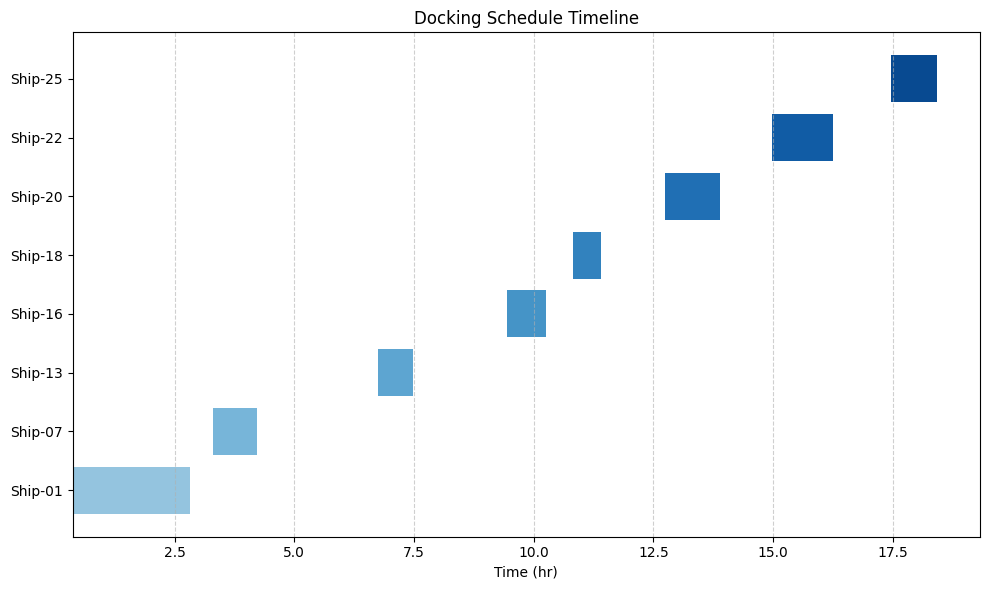

In [7]:
df_plot = hybrid_schedule_df.copy().reset_index(drop=True)

# Assign a vertical position (y) to each ship
df_plot['y'] = range(len(df_plot))

blues = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_plot)))

# Set up the figure
plt.figure(figsize=(10, 6))

# Draw a bar for each ship
for i, row in df_plot.iterrows():
    plt.barh(
        y=row['y'],
        width=row['End Time (hr)'] - row['Start Time (hr)'],
        left=row['Start Time (hr)'],
        height=0.8,
        color=blues[i]
    )

# Set y-ticks to ship IDs for clarity
plt.yticks(df_plot['y'], df_plot['Ship ID'])

# Axis labels and title
plt.xlabel("Time (hr)")
plt.title("Docking Schedule Timeline")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Best Algorithm Option

With the results of three options Greedy with Dynamic Programming is the best choice for the problem

Even Greedy with earliest end time makes the most number of ships, its

- it neglect the priority weight for each ship factor

Even Greedy that include total priority weight is used,

- it not optimized for strategic value

Greedy with Dynamic Programming makes the best balances in all aspects as it

- it include all the factor in terms of time(15 hours) and prioritise the weight
- optimizes for strategic value rather than just quantity.
